We are importing 'genfromtxt' class from NumPy library. (More on genfromtxt here https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html)

In [57]:
from numpy import genfromtxt

We are using 'Matplotlib' a great graph plotting library usually used with python. 'pyplot' gives us set of functions that we can use to plot graphs. (More on pyplot here https://matplotlib.org/users/pyplot_tutorial.html)

In [58]:
import matplotlib.pyplot as plt

The following method is being used for computing errors. The error is defined as the average of distance of our line of best fit from the original points given in the data input

In [59]:
def compute_error(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError += (y - (m*x + b)) ** 2
    return totalError / float(len(points))

The value of Y for all the x values on the list with the given slope and constant values

In [60]:
def compute_y(b,m,xlist):
    yfinal=[]
    for i in range(len(xlist)):
        yfinal.append(m*xlist[i]+b)

    return yfinal

The step gradient function is the main function of this

In [61]:
def step_gradient(b, m, points, learning_rate):
    b_gradient=0
    m_gradient=0
    ylist=[]
    xlist=[]
    N=float(len(points))
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        ylist.append(y)
        xlist.append(x)
        b_gradient += -(2/N) * (y - ((m * x) + b))
        m_gradient += -(2/N) * x * (y - ((m * x) + b))
    new_b = b - (learning_rate * b_gradient)
    new_m = m - (learning_rate * m_gradient)
    return [new_b, new_m, ylist, xlist]

In [62]:
def gradient_descent_runner(points, b, m, learning_rate, iterations):
    b = b
    m = m
    for i in range(iterations):
        [b, m, ylist, xlist] = step_gradient(b, m, array(points), learning_rate)
    return [b, m, ylist, xlist]

The run method is the main method here where we are doing a lot of things
1. '%matplotlib inline' this line of code helps us plot our graph in line with the running code (especially while using Jupyter notebook). it is not necessary when you are running this code in command prompt
2. the second line is where we read the data from our csv(comma seperated value) file using the above described class called 'genfromtxt'
3. The Hyper parameters are the tuners for reaching our desired goal. Our hyper parameters here are,
1. 'learning_rate':- The rate at which our model should converge to optimal solution.
2. The initial slope and constant values for a straight line 'initial_m' and 'initial_b' are set to be 0
3. the number of iterations will tell us how many times we think our model should run before it reaches local minimum using gradient descent
4. we are displaying the error rate and intial slope and constant(b and m values)
5. A method call is made to gradient_descent_runner method for running the gradient descent
6. the final values of slope(m), constant(b) and error are calculated using compute_error method
7. Now comes the Graph plotting
8. The List of input points from data.csv are plotted on the graph and our Optimal solution, the line of best fit, is plotted along with it for comparision
9. we are displaying the graph using show method


In [63]:
def run():
    %matplotlib inline
    points = genfromtxt('./data.csv', delimiter=',')
    # Hyper parameters
    learning_rate=0.0001
    # y=mx+b
    initial_m=0
    initial_b=0
    num_iterations=1000
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error(initial_b, initial_m, points))
    print "Running...."
    [b,m,ylist,xlist] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations, b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error(b, m, points))
    plt.scatter(xlist,ylist)
    plt.plot(xlist,compute_y(b,m,xlist))
    plt.show()

Running our Model to calculate the line of best fit while minimising errors using an optimization method called Gradient Descent

Starting gradient descent at b = 0, m = 0, error = 5565.10783448
Running....
After 1000 iterations, b = 0.0889365199374, m = 1.47774408519, error = 112.614810116


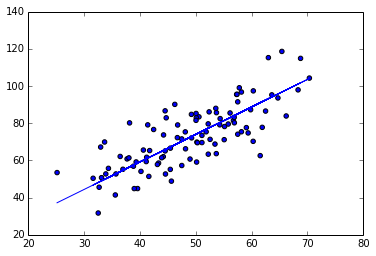

In [64]:
if __name__ == '__main__':
	run()